In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [179]:
df = pd.read_csv('Lab desicion trees/data_customer-churn.csv')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [181]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Preprocessing

In [182]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [183]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [184]:
df = pd.get_dummies(df.select_dtypes('object'), drop_first=True)

In [185]:
df.columns

Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'Churn_Yes'],
      dtype='object')

## Modelling

In [186]:
X = df.drop(labels = 'Churn_Yes', axis = 1)
y = df['Churn_Yes']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [188]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 18), (2113, 18), (4930,), (2113,))

,Error_metric,Train,Test
0,Accuracy,0.773225,0.756271
1,Precision,0.574194,0.579957
2,Recall,0.487099,0.461017


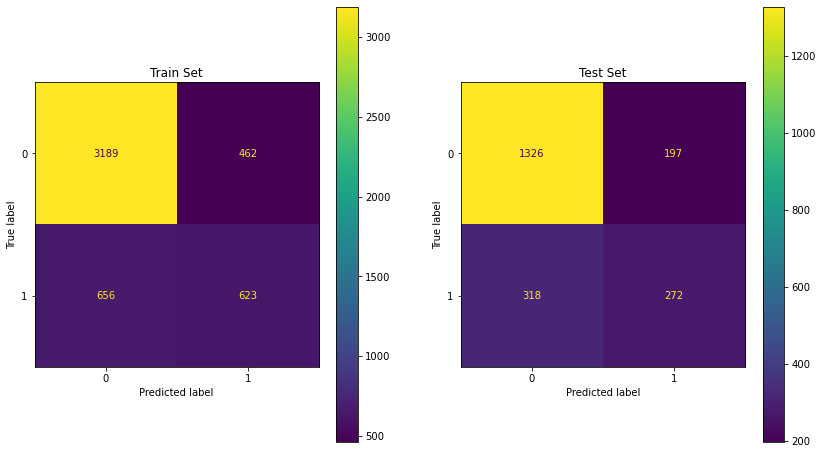

In [220]:
destree = DecisionTreeClassifier(max_depth=6, min_samples_split=5, max_features=13)
destree.fit(X_train, y_train)


y_pred_train_dt = destree.predict(X_train)
y_pred_test_dt = destree.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
ConfusionMatrixDisplay.from_estimator(destree,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
ConfusionMatrixDisplay.from_estimator(destree,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 18 artists>

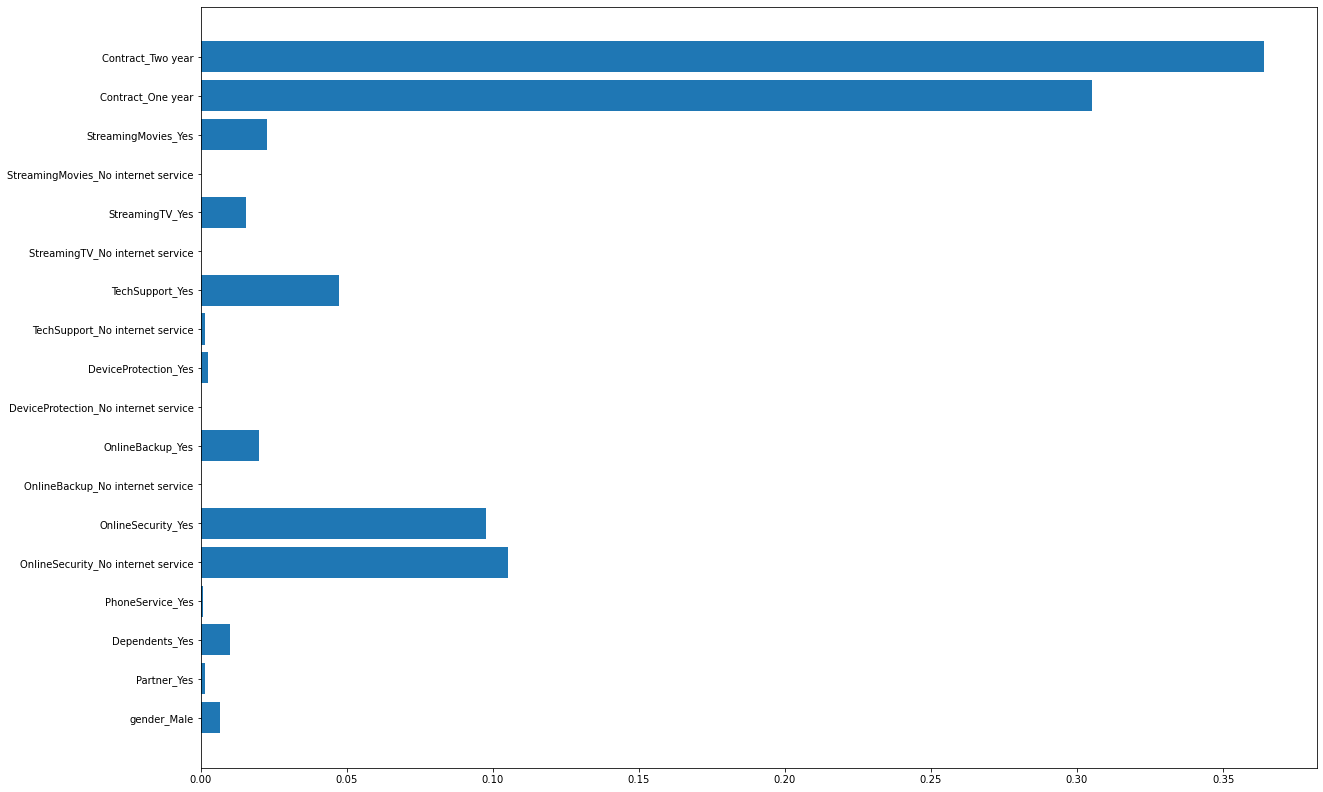

In [221]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,destree.feature_importances_)

In [225]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (500,50))

plot_tree(destree,filled = True, rounded=True,feature_names=X.columns)
plt.show() 
plt.savefig('destree.jpg')

<Figure size 432x288 with 0 Axes>

## Optimization using GridSearchCV:

In [208]:
params = [{'max_depth':[4,5,6,10,14,20], 'min_samples_split':[2,3,5,6], 'max_features':[11,12,13,14]}]

In [209]:
destree_op = DecisionTreeClassifier()

In [210]:
gs_destree = GridSearchCV(destree_op, param_grid=params,scoring='accuracy', cv=5)

In [211]:
gs_destree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [4, 5, 6, 10, 14, 20],
                          'max_features': [11, 12, 13, 14],
                          'min_samples_split': [2, 3, 5, 6]}],
             scoring='accuracy')

In [ ]:
gs_destree.best_params_,gs_destree.score(X_train, y_train)

In [218]:
gs1, gs2 

(({'max_depth': 6, 'max_features': 13, 'min_samples_split': 5},),
 0.7732251521298175)

In [219]:
gs1_param1, gs1_scroe 

({'max_depth': 6, 'max_features': 12, 'min_samples_split': 5},
 0.7657200811359026)

0.7657200811359026